# <center> Formation à la manipulation de données textuelles en Python </center>
## <center>  Jean-Philippe Magué (ENS de Lyon) - Julien Velin (Université Lumière Lyon 2) </center> 

# 2. Tokenisation et lemmatisation des textes

Les textes que nous venons de télécharger sont, pour un être humain, une suite de mots. Mais pour un ordinateur, ce ne sont que des suites de caractères. Si l'on souhaite étudier le lexique qui les compose, il falloir transformer ces suites de caractères en suite de mots.
On pourrait, en première approximation, découper ces textes à chaque espace :

In [78]:
with open('labos/ARAR/projet_scientifique.txt', encoding='utf8') as f:
        texte=f.read()
        for mot in texte.split(' '):
            print(mot)

Le
laboratoire
ArAr
est
né
en
2000
de
l’union
de
deux
laboratoires
d’archéométrie
:
le
Laboratoire
de
Céramologie
de
Lyon,
créé
en
1967
par
Maurice
Picon,
et
le
Centre
de
Datation
par
le
Radiocarbone,
fondé
par
Jacques
Evin
en
1965.
Très
vite,
il
intègre
des
enseignants-chercheurs
de
l’Université
Lumière
Lyon
2
et
devient
une
Unité
Mixte
de
Recherches
(UMR)
dont
la
configuration
intrinsèquement
pluridisciplinaire
est
unique
en
France.
Ses
activités
sont
d’une
part
concentrées
sur
l’archéologie
protohistorique
régionale
et
sur
l’archéologie
antique
et
médiévale
en
France
et
à
l’Etranger,
mais
aussi
sur
l’histoire
des
techniques
avec
l’étude
de
l’exploitation
des
matières
premières
pour
le
bâti
et
pour
les
céramiques
anciennes,
sur
l’économie
des
petits
objets
archéologiques
et
sur
la
datation
par
le
Carbone
14.
Les
activités
du
laboratoire
ARAR
reposent
donc
à
la
fois
sur
une
solide
tradition
en
archéométrie
et
sur
une
recherche
archéologique
de
terrain
en
France
et
à
l’étranger
(abbaye

Cette solution n'est pas satisfaisante : les mots ne sont pas systématiquement séparés par un espace (voire peuvent contenir un espace : *parce que*) et la ponctuation n'est pas traité comme on le souhaiterait. 

Le découpage que l'on veut obtenir isolerait chaque unité, chaque *token* : 
```
Le
laboratoire
ArAr
est
né
en
2000
de
l’
union
de
deux
laboratoires
d’
archéométrie
:
le
Laboratoire
de
Céramologie
de
Lyon
,
créé
en
1967
par
Maurice
Picon
...
```
En traitement automatique des langues, cette opération s'appelle la **tokenisation**. Plusieurs packages Python permettent de réaliser cette opération. Nous allons utiliser [spaCy](https://spacy.io/).

La manière de tokeniser un texte (et plus généralement les méthodes de TAL) dépendent de la langue du texte. Pour utiliser spaCy sur une langue donnée, il faut donc lui indiquer quelle langue, ou plutôt quel [modèle de langue](https://spacy.io/models) utiliser. Et pour pouvoir utiliser un modèle de langue, il faut avant tout l'avoir téléchargé :

In [ ]:
!python -m spacy download fr_core_news_sm

On peut à présent utiliser ce modèle : 

In [1]:
import spacy

In [6]:
nlp = spacy.load("fr_core_news_sm")

In [8]:
with open('labos/ARAR/projet_scientifique.txt', encoding='utf8') as f:
        texte=f.read()
        doc = nlp(texte)
        for token in doc:
            print(token)

Le
laboratoire
ArAr
est
né
en
2000
de
l’
union
de
deux
laboratoires
d’
archéométrie
:
le
Laboratoire
de
Céramologie
de
Lyon
,
créé
en
1967
par
Maurice
Picon
,
et
le
Centre
de
Datation
par
le
Radiocarbone
,
fondé
par
Jacques
Evin
en
1965
.
Très
vite
,
il
intègre
des
enseignants
-
chercheurs
de
l’
Université
Lumière
Lyon
2
et
devient
une
Unité
Mixte
de
Recherches
(
UMR
)
dont
la
configuration
intrinsèquement
pluridisciplinaire
est
unique
en
France
.
Ses
activités
sont
d’
une
part
concentrées
sur
l’
archéologie
protohistorique
régionale
et
sur
l’
archéologie
antique
et
médiévale
en
France
et
à
l’
Etranger
,
mais
aussi
sur
l’
histoire
des
techniques
avec
l’
étude
de
l’
exploitation
des
matières
premières
pour
le
bâti
et
pour
les
céramiques
anciennes
,
sur
l’
économie
des
petits
objets
archéologiques
et
sur
la
datation
par
le
Carbone
14
.


Les
activités
du
laboratoire
ARAR
reposent
donc
à
la
fois
sur
une
solide
tradition
en
archéométrie
et
sur
une
recherche
archéologique
de
terrain
en
Fran

## Calcul de la taille des textes, manipulation de *DataFrame*

### Exercice 2.1
Construire le dictionnnaire suivant qui donne pour chaque labo le nombre de tokens dans chacun des deux textes s'y rapportant : 
```python
{
  'ARAR': {
    'projet_scientifique': 446,
    'Compétences_activités_valorisables': 371
  },
  'ARCHEORIENT': {
    'projet_scientifique': 509,
    'Compétences_activités_valorisables': 74
  },
  'CEL': {
    'projet_scientifique': 155,
    'Compétences_activités_valorisables': 109
  },
...
```

In [11]:
from pathlib import Path

In [25]:
sizes={}
for labo in labos:
    sizes[labo]={}
    
    projet = f'labos/{labo}/projet_scientifique.txt'
    if Path(projet).is_file():
        with open(f'labos/{labo}/projet_scientifique.txt', encoding='utf8') as f:
            sizes[labo]['projet_scientifique']=len(nlp(f.read()))
    
    compétences = f'labos/{labo}/Compétences_activités_valorisables.txt'
    if Path(compétences).is_file():
        with open(f'labos/{labo}/Compétences_activités_valorisables.txt', encoding='utf8') as f:
            sizes[labo]['Compétences_activités_valorisables']=len(nlp(f.read()))

  0%|          | 0/52 [00:00<?, ?it/s]

Pour aller plus loin dans les analyses, cette structuration des données sous forme d'un dictionnaire n'est pas idéale. La bibliothèque [Pandas](https://pandas.pydata.org/) propose une structure de donnée sous forme de tablea, un **DataFrame**, bien plus appropriée.

In [17]:
import pandas as pd

In [27]:
sizes=pd.DataFrame.from_dict(sizes,orient='index')

In [58]:
sizes.head() # head permet d'afficher les premières lignes (5 par défaut) d'un DataFrame

,projet_scientifique,Compétences_activités_valorisables
ARAR,446.0,371.0
ARCHEORIENT,509.0,74.0
CEL,155.0,109.0
CERCOR,488.0,99.0
CERLA,217.0,55.0


Un DataFrame est un tableau dont les colonnes et les lignes sont nommés

In [38]:
sizes.columns

Index(['projet_scientifique', 'Compétences_activités_valorisables'], dtype='object')

In [39]:
sizes.index

Index(['ARAR', 'ARCHEORIENT', 'CEL', 'CERCOR', 'CERLA', 'CGN', 'CIHAM', 'CMW',
       'COACTIS', 'CRPPC', 'DCT', 'DDL', 'DIPHE', 'ECLLA', 'ECP', 'EDIEC',
       'EDPL', 'ELICO', 'ELJ', 'EMC', 'ERIC', 'EVS', 'FMRI', 'GATE', 'GRAPHOS',
       'GREPS', 'HISOMA', 'IAO', 'ICAR', 'IETT', 'IHRIM', 'IRAA', 'IRPHIL',
       'ISERL', 'LADEC', 'LAET', 'LARHRA', 'LCE', 'LER', 'LIRIS', 'LVIS',
       'MAELYSE', 'MAGELLAN', 'MARGE', 'MOM', 'PASSAGES', 'RESHAPE', 'S2HEP',
       'SAF', 'TRIANGLE', 'CERCRID'],
      dtype='object')

On peut accéder facilement aux différentes lignes et colonnes d'un DataFrame :

In [32]:
sizes.loc['CERLA']

projet_scientifique                   217.0
Compétences_activités_valorisables     55.0
Name: CERLA, dtype: float64

In [33]:
sizes.loc['CERLA', 'Compétences_activités_valorisables']

55.0

In [34]:
sizes.loc[:, 'Compétences_activités_valorisables']

ARAR           371.0
ARCHEORIENT     74.0
CEL            109.0
CERCOR          99.0
CERLA           55.0
CGN             72.0
CIHAM          174.0
CMW             74.0
COACTIS         24.0
CRPPC           36.0
DCT              NaN
DDL             96.0
DIPHE           81.0
ECLLA            NaN
ECP             76.0
EDIEC           55.0
EDPL            96.0
ELICO           68.0
ELJ              9.0
EMC            178.0
ERIC           246.0
EVS             40.0
FMRI             NaN
GATE            43.0
GRAPHOS         62.0
GREPS            NaN
HISOMA         118.0
IAO             69.0
ICAR           110.0
IETT             NaN
IHRIM          204.0
IRAA            33.0
IRPHIL           NaN
ISERL          170.0
LADEC            NaN
LAET           167.0
LARHRA          94.0
LCE             78.0
LER              NaN
LIRIS            NaN
LVIS             NaN
MAELYSE          NaN
MAGELLAN        29.0
MARGE           24.0
MOM            119.0
PASSAGES       110.0
RESHAPE         55.0
S2HEP        

In [35]:
sizes['Compétences_activités_valorisables']

ARAR           371.0
ARCHEORIENT     74.0
CEL            109.0
CERCOR          99.0
CERLA           55.0
CGN             72.0
CIHAM          174.0
CMW             74.0
COACTIS         24.0
CRPPC           36.0
DCT              NaN
DDL             96.0
DIPHE           81.0
ECLLA            NaN
ECP             76.0
EDIEC           55.0
EDPL            96.0
ELICO           68.0
ELJ              9.0
EMC            178.0
ERIC           246.0
EVS             40.0
FMRI             NaN
GATE            43.0
GRAPHOS         62.0
GREPS            NaN
HISOMA         118.0
IAO             69.0
ICAR           110.0
IETT             NaN
IHRIM          204.0
IRAA            33.0
IRPHIL           NaN
ISERL          170.0
LADEC            NaN
LAET           167.0
LARHRA          94.0
LCE             78.0
LER              NaN
LIRIS            NaN
LVIS             NaN
MAELYSE          NaN
MAGELLAN        29.0
MARGE           24.0
MOM            119.0
PASSAGES       110.0
RESHAPE         55.0
S2HEP        

In [37]:
sizes.iloc[4,1]

55.0

Pour certains labos, on observe la valeur `NaN` : cela représente les valeurs manquantes, les cas où l'on n'a pas de texte. Pandas est assez souple dans le maniement de ces valeurs manquantes. Mais éviter tout problème, on peut vouloir les remplacer par 0 :

In [59]:
sizes=sizes.fillna(0)

In [60]:
sizes['Compétences_activités_valorisables']

ARAR           371.0
ARCHEORIENT     74.0
CEL            109.0
CERCOR          99.0
CERLA           55.0
CGN             72.0
CIHAM          174.0
CMW             74.0
COACTIS         24.0
CRPPC           36.0
DCT              0.0
DDL             96.0
DIPHE           81.0
ECLLA            0.0
ECP             76.0
EDIEC           55.0
EDPL            96.0
ELICO           68.0
ELJ              9.0
EMC            178.0
ERIC           246.0
EVS             40.0
FMRI             0.0
GATE            43.0
GRAPHOS         62.0
GREPS            0.0
HISOMA         118.0
IAO             69.0
ICAR           110.0
IETT             0.0
IHRIM          204.0
IRAA            33.0
IRPHIL           0.0
ISERL          170.0
LADEC            0.0
LAET           167.0
LARHRA          94.0
LCE             78.0
LER              0.0
LIRIS            0.0
LVIS             0.0
MAELYSE          0.0
MAGELLAN        29.0
MARGE           24.0
MOM            119.0
PASSAGES       110.0
RESHAPE         55.0
S2HEP        

On peut facilement procéder à tout un tas de caluls sur les DataFrames

In [41]:
sizes.mean()

projet_scientifique                   332.420000
Compétences_activités_valorisables    101.052632
dtype: float64

In [42]:
sizes.sum(axis=1)

ARAR           817.0
ARCHEORIENT    583.0
CEL            264.0
CERCOR         587.0
CERLA          272.0
CGN            203.0
CIHAM          527.0
CMW            428.0
COACTIS        509.0
CRPPC          425.0
DCT            358.0
DDL            231.0
DIPHE          588.0
ECLLA            7.0
ECP            565.0
EDIEC          434.0
EDPL           331.0
ELICO          292.0
ELJ            483.0
EMC            587.0
ERIC           440.0
EVS            474.0
FMRI           461.0
GATE           526.0
GRAPHOS        443.0
GREPS          690.0
HISOMA         625.0
IAO            348.0
ICAR           354.0
IETT           199.0
IHRIM          544.0
IRAA           248.0
IRPHIL         281.0
ISERL          524.0
LADEC          172.0
LAET           387.0
LARHRA         264.0
LCE            252.0
LER            480.0
LIRIS          572.0
LVIS           258.0
MAELYSE        280.0
MAGELLAN       386.0
MARGE          247.0
MOM            417.0
PASSAGES       555.0
RESHAPE        228.0
S2HEP        

In [63]:
sizes.sort_values('projet_scientifique')

,projet_scientifique,Compétences_activités_valorisables
CERCRID,0.0,135.0
ECLLA,7.0,0.0
CGN,131.0,72.0
DDL,135.0,96.0
SAF,139.0,0.0
CEL,155.0,109.0
LARHRA,170.0,94.0
LADEC,172.0,0.0
RESHAPE,173.0,55.0
LCE,174.0,78.0


In [61]:
sizes.loc[sizes.sum(axis=1).sort_values(ascending=True).index]

,projet_scientifique,Compétences_activités_valorisables
ECLLA,7.0,0.0
CERCRID,0.0,135.0
SAF,139.0,0.0
LADEC,172.0,0.0
IETT,199.0,0.0
CGN,131.0,72.0
RESHAPE,173.0,55.0
DDL,135.0,96.0
MARGE,223.0,24.0
IRAA,215.0,33.0


Il est facile d'enregistrer (et de lire) un DataFrame dans [différents formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [66]:
sizes.to_csv('tailles.csv') # l'encodage de caractères est utf-8 par défaut

In [21]:
sizes=pd.read_csv('tailles.csv', index_col=0)

Pandas permet de créer des graphiques à partir d'un DataFrame :

<AxesSubplot:>

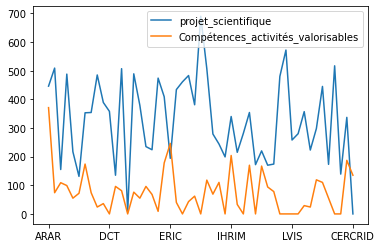

In [24]:
sizes.plot()

<AxesSubplot:>

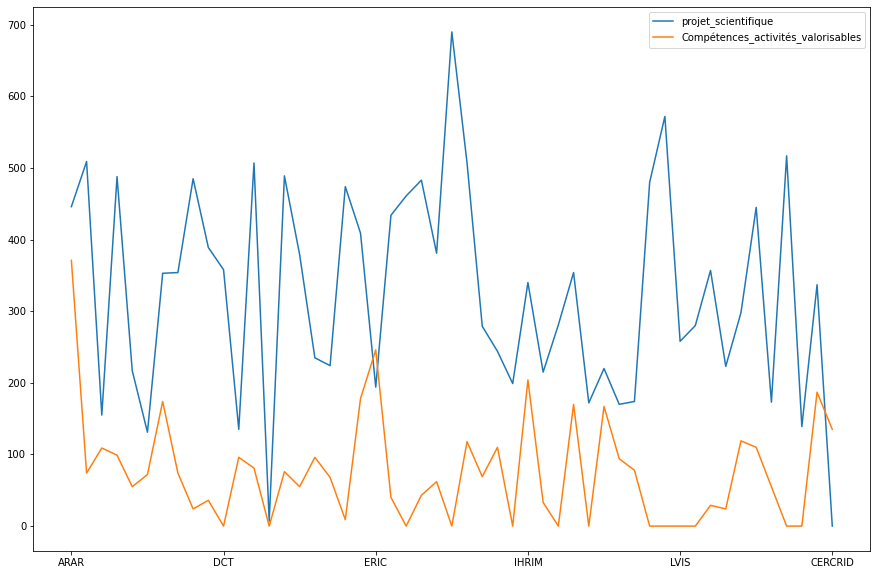

In [25]:
sizes.plot(figsize=(15,10))

<AxesSubplot:>

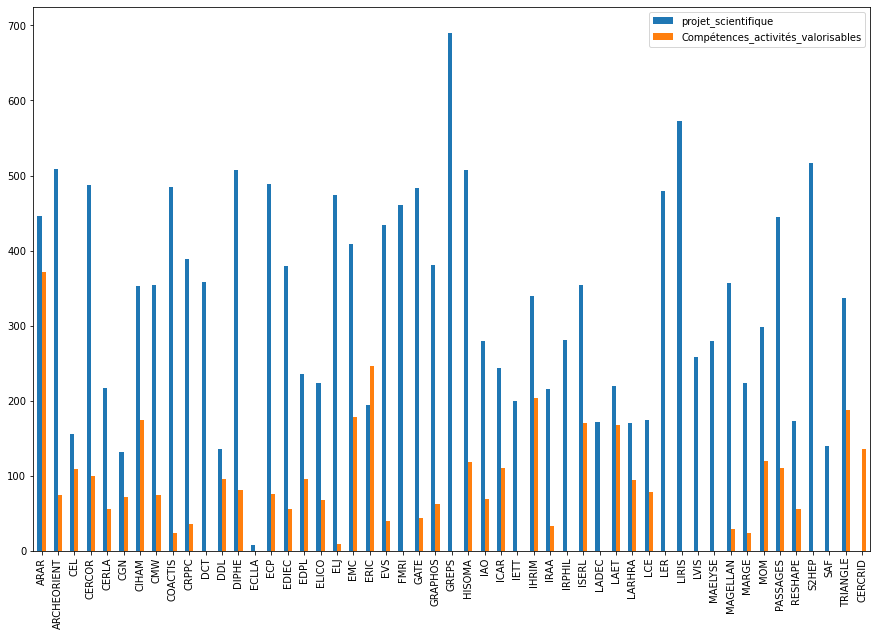

In [26]:
sizes.plot.bar(figsize=(15,10))

<AxesSubplot:>

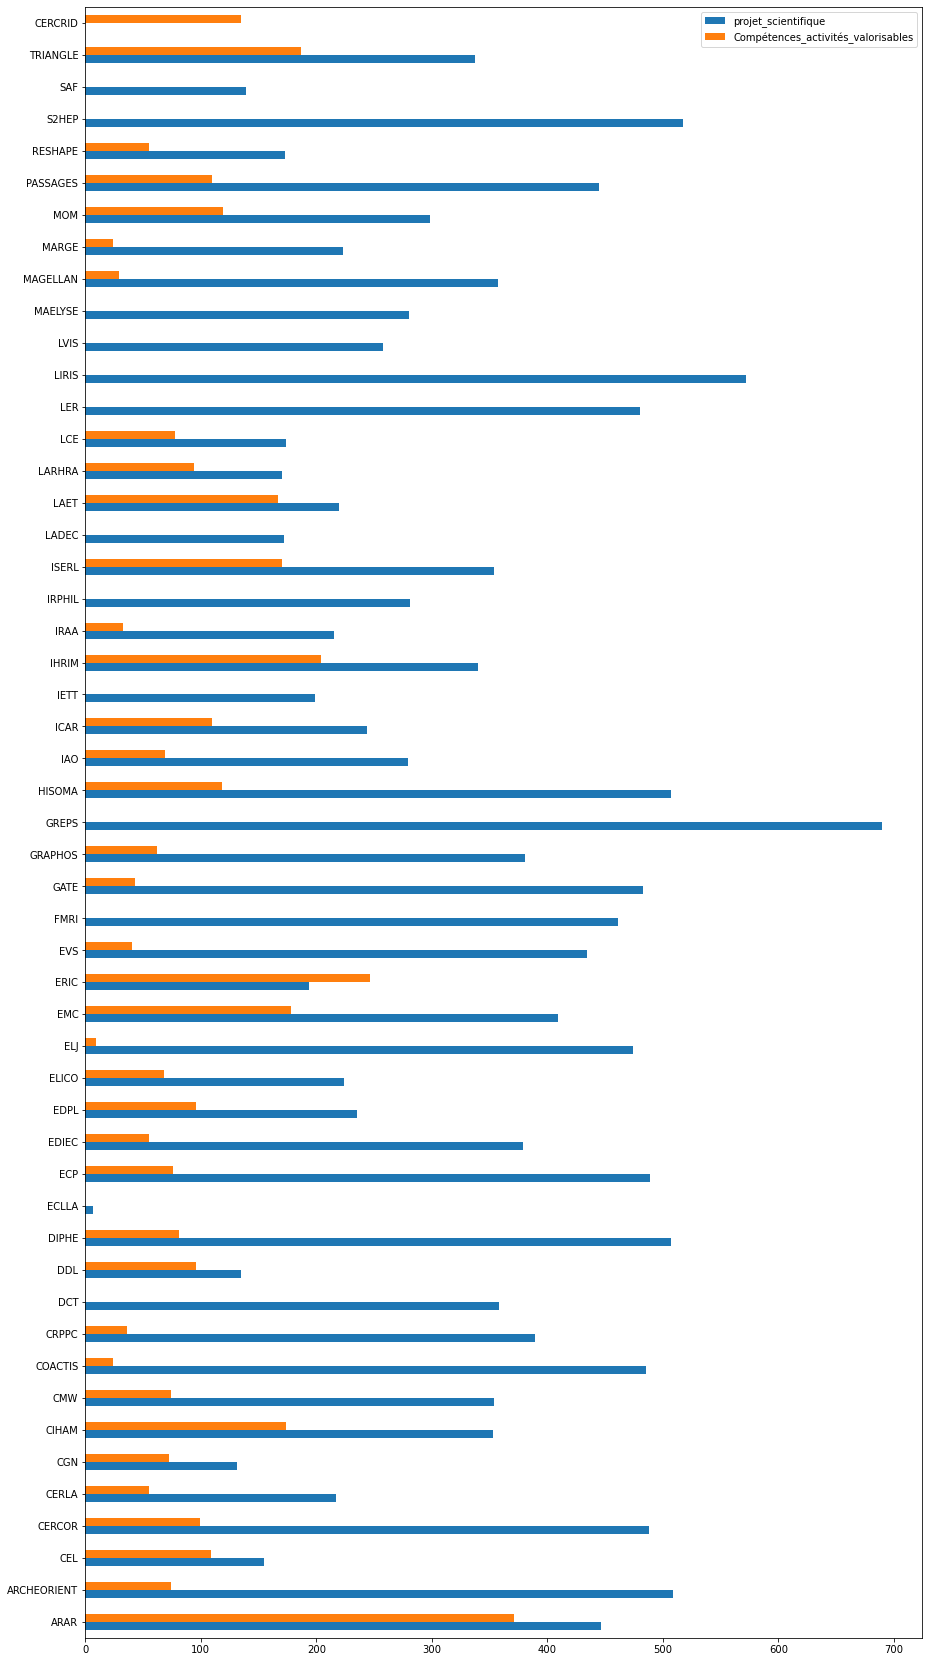

In [28]:
sizes.plot.barh(figsize=(15,30))

### Exercice 2.2
Reproduire le même graphique que ci-dessus, mais avec les laboratoires triés selon le nombre total de tokens

<AxesSubplot:>

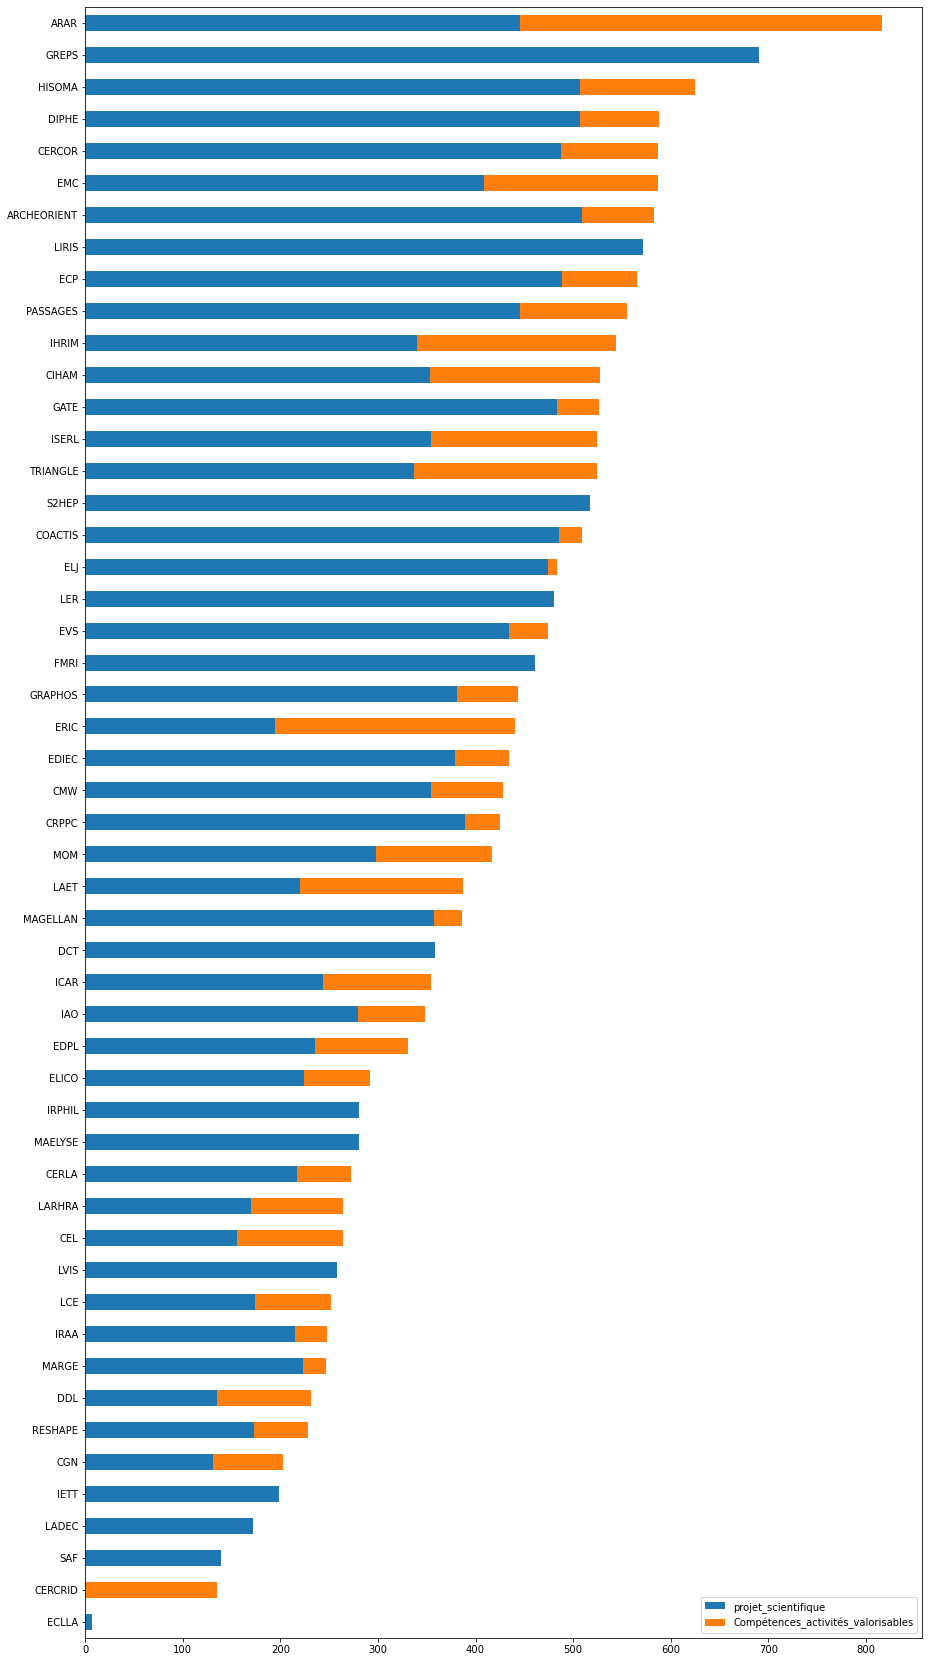

In [37]:
sizes.loc[sizes.sum(axis=1).sort_values(ascending=True).index].plot.barh(stacked=True, figsize=(15,30))

## Lemmatisation

La question de savoir ce qu'est un mot est un peu ambiguë. Par exemple, combien y a-t-il de mots dans la phrase `le chat suit les chats des voisins sur le mur` ?

Il convient donc de distinguer plusieurs choses. Il y a :
* 10 *tokens*, 
* 9 *mots* et le mot `le` a 2 *occurrences*
* 7 *lemmes* : `le`, `chat`, `suivre`, `de`, `voisin`, `sur` et `mur`

Le lemme d'un mot est sa forme canonique, abstraite marque morphologique. C'est la forme que l'on chercherait dans un dictionnaire. 

La lemmatisation est l'opération qui consiste à associer à chaque token le lemme correspondant. Cette opération est réalisée par spaCy :

In [113]:
doc=nlp("le chat suit les chats des voisins sur le mur")
for token in doc:
    print(token.lemma_)

le
chat
suivre
le
chat
de
voisin
sur
le
mur


In [110]:
with open('labos/ARAR/projet_scientifique.txt', encoding='utf8') as f:
        texte=f.read()
        doc = nlp(texte)
        for token in doc:
            print(token.lemma_)

le
laboratoire
arar
être
naître
en
2000
de
l’
union
de
deux
laboratoire
d’
archéométrie
:
le
laboratoire
de
céramologie
de
Lyon
,
créer
en
1967
par
maurice
Picon
,
et
le
centre
de
datation
par
le
Radiocarbone
,
fonder
par
Jacques
Evin
en
1965
.
très
vite
,
il
intégrer
de
enseignant
-
chercheur
de
l’
université
Lumière
Lyon
2
et
devenir
un
unité
Mixte
de
Recherches
(
umr
)
dont
le
configuration
intrinsèquement
pluridisciplinaire
être
unique
en
France
.
son
activité
être
d’
un
part
concentrer
sur
l’
archéologie
protohistorique
régional
et
sur
l’
archéologie
antique
et
médiéval
en
France
et
à
l’
Etranger
,
mais
aussi
sur
l’
histoire
de
technique
avec
l’
étude
de
l’
exploitation
de
matière
premier
pour
le
bâti
et
pour
le
céramique
ancien
,
sur
l’
économie
de
petit
objet
archéologique
et
sur
le
datation
par
le
carbone
14
.


le
activité
de
laboratoire
ARAR
reposent
donc
à
le
fois
sur
un
solide
tradition
en
archéométrie
et
sur
un
recherche
archéologique
de
terrain
en
France
et
à
l’
étranger


Tokenisation et lemmatisation sont 2 opérations parmi d'[autres réalisées par spaCy](https://spacy.io/usage/processing-pipelines) :

![spaCy pipeline](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg)

In [128]:
doc=nlp("le chat suit les chats des voisins sur le mur")
print(f'token\tlemme\tpart. du disc.\tanalyse moprphologique')
print('--------------------------------------------------------------------------------------------')
for token in doc:
    print(f'{token}\t{token.lemma_}\t{token.pos_}\t\t{token.morph}')

token	lemme	part. du disc.	analyse moprphologique
--------------------------------------------------------------------------------------------
le	le	DET		Definite=Def|Gender=Masc|Number=Sing|PronType=Art
chat	chat	NOUN		Gender=Masc|Number=Sing
suit	suivre	VERB		Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
les	le	DET		Definite=Def|Number=Plur|PronType=Art
chats	chat	NOUN		Gender=Masc|Number=Plur
des	de	ADP		Definite=Def|Number=Plur|PronType=Art
voisins	voisin	NOUN		Gender=Masc|Number=Plur
sur	sur	ADP		
le	le	DET		Definite=Def|Gender=Masc|Number=Sing|PronType=Art
mur	mur	NOUN		Gender=Masc|Number=Sing


### Exercice 2.3
Pour chaque laboratoire, créer un ficher `labos/<labo>/lemmes.txt` les lemmes des deux textes réunis, à raison d'un lemme par ligne

In [3]:
import json

In [4]:
with open('labos.json', encoding='utf8') as f:
    labos = json.loads(f.read())

In [38]:
for labo in labos:
    lemmes=[]
    projet = f'labos/{labo}/projet_scientifique.txt'
    if Path(projet).is_file():
        with open(f'labos/{labo}/projet_scientifique.txt', encoding='utf8') as f:
            for token in nlp(f.read()):
                lemmes.append(token.lemma_)

    compétences = f'labos/{labo}/Compétences_activités_valorisables.txt'
    if Path(compétences).is_file():
        with open(f'labos/{labo}/Compétences_activités_valorisables.txt', encoding='utf8') as f:                
            for token in nlp(f.read()):
                lemmes.append(token.lemma_)
    if len(lemmes)>0:
        with open(f'labos/{labo}/lemmes.txt', 'w', encoding='utf8') as f:
            for lemme in lemmes:
                f.write(lemme+'\n')